## [Fashion-MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist)

In [2]:
import os
import random
import numpy as np
import torch
import torchvision

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [4]:
dataset = torchvision.datasets.FashionMNIST('../data', download=True)

In [5]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [6]:
print(len(dataset))

60000


In [7]:
n = 200
data, target = dataset[n]

In [8]:
print(type(data))

<class 'PIL.Image.Image'>


In [9]:
print(data.mode, data.width, data.height)

L 28 28


In [10]:
print(type(target))

<class 'int'>


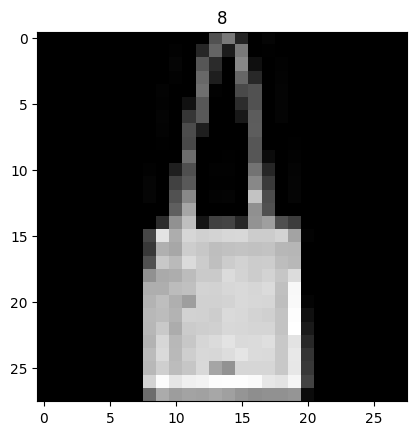

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [12]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.FashionMNIST('../data', transform = ToTensor)

In [13]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])


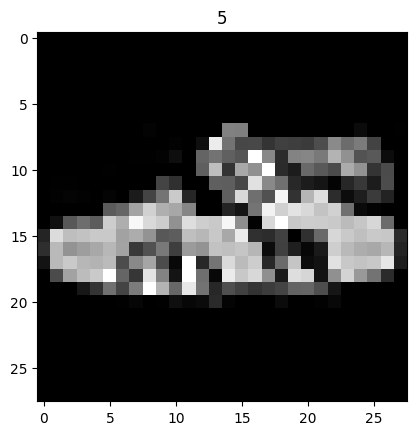

In [14]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(color)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [15]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


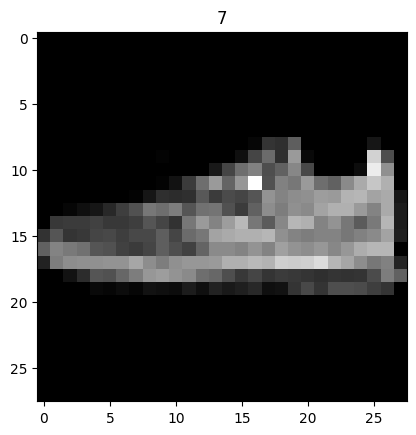

In [16]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    img = img[0] 
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [17]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 60000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 60000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 60]
Total number of data: 60000


In [18]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [19]:
import torchvision.transforms as transforms
compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])

train_data = torchvision.datasets.FashionMNIST(root='./data/', train=True, transform=compose, download=True)
test_data  = torchvision.datasets.FashionMNIST(root='./data/', train=False, transform=compose, download=True)

100%|██████████| 26421880/26421880 [00:00<00:00, 39361751.31it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 105285.66it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1893364.99it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14414070.09it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [20]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 60000
test sets: 10000


In [21]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [22]:
class FashionMNISTModel(nn.Module):
    def __init__(self, output_size):
        super(FashionMNISTModel, self).__init__()

        self.c1 = nn.Conv2d(1, 16, kernel_size=3)
        self.c2 = nn.Conv2d(16, 32, kernel_size=3) 
        self.c3 = nn.Conv2d(32, 64, kernel_size=3)
        self.c4 = nn.Conv2d(64, 64, kernel_size=1)

        nn.init.kaiming_normal_(self.c1.weight)
        nn.init.kaiming_normal_(self.c2.weight)
        nn.init.kaiming_normal_(self.c3.weight)
        nn.init.kaiming_normal_(self.c4.weight)
        
        self.cv = nn.Sequential(
                self.c1,
                nn.BatchNorm2d(16),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.MaxPool2d(2),
                self.c2,
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c3,
                nn.BatchNorm2d(64),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c4,
                nn.BatchNorm2d(64),
                nn.ReLU(),
                nn.Dropout(0.2)
        )

        self.l1 = nn.Linear(64*9*9, 512)
        self.l2 = nn.Linear(512, 256)
        self.l3 = nn.Linear(256, output_size)
        nn.init.kaiming_normal_(self.l1.weight)
        nn.init.kaiming_normal_(self.l2.weight)
        nn.init.kaiming_normal_(self.l3.weight)

        self.fc = nn.Sequential(self.l1,
                        nn.BatchNorm1d(512),
                        nn.ReLU(),
                        self.l2,
                        nn.BatchNorm1d(256),
                        nn.ReLU(),
                        self.l3,
                        nn.BatchNorm1d(output_size),
                        nn.ReLU()
                    )        

    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 64*9*9)
        output = self.fc(x)
        value = torch.max(output, 1)[1]
        return output, value

In [23]:
model = FashionMNISTModel(10).to(device)

In [24]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 1, 28, 28])
tensor([[0.0000, 1.2174, 0.0000, 0.0000, 0.3943, 0.0000, 0.1066, 0.0000, 0.5042,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.6428, 0.2920, 0.1315, 0.0000, 0.6401,
         0.0000],
        [2.6343, 0.0000, 0.0000, 1.4996, 0.7331, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0425],
        [0.0000, 0.0000, 2.0608, 0.6466, 0.4680, 0.0000, 2.1260, 1.1731, 0.1340,
         0.0000],
        [0.0000, 0.0000, 0.1503, 1.0215, 0.0000, 1.9087, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.3984, 0.0000, 0.0000, 1.4924, 0.4840, 1.0810, 2.1713,
         1.1538],
        [0.8099, 1.1894, 1.2301, 0.0000, 1.2137, 0.3026, 1.0826, 0.0274, 0.0000,
         0.6673],
        [0.1756, 0.7355, 0.0000, 0.8057, 0.4778, 0.0000, 0.0000, 1.4354, 0.0000,
         1.5544],
        [0.0000, 1.2098, 0.2871, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5801,
         0.0000],
        [0.0000, 0.3231, 0.0000, 0.3464, 0.0000, 0.0000, 0.0000, 0.6127, 0.0000,


In [25]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [29]:
model = FashionMNISTModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_data
        del train_target

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, idx_pred = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 0.6753594323992729 test loss: 0.4446479380130768, accuracy: 87.23999786376953
epoch 1th training loss: 0.3589743162194888 test loss: 0.332419154047966, accuracy: 88.95999908447266
epoch 2th training loss: 0.2901620425283909 test loss: 0.2925039678812027, accuracy: 90.08999633789062
epoch 3th training loss: 0.25624004304409026 test loss: 0.2920182228088379, accuracy: 90.08999633789062
epoch 4th training loss: 0.23234675476948422 test loss: 0.27277635633945463, accuracy: 90.70999908447266
epoch 5th training loss: 0.21074337810277938 test loss: 0.24285440593957902, accuracy: 91.66999816894531
epoch 6th training loss: 0.19655323599775631 test loss: 0.2259676456451416, accuracy: 92.14999389648438
epoch 7th training loss: 0.1806980051100254 test loss: 0.23330262452363967, accuracy: 91.93000030517578
epoch 8th training loss: 0.16726549938321114 test loss: 0.22954669445753098, accuracy: 91.87999725341797
epoch 9th training loss: 0.15571437552571296 test loss: 0.2227151

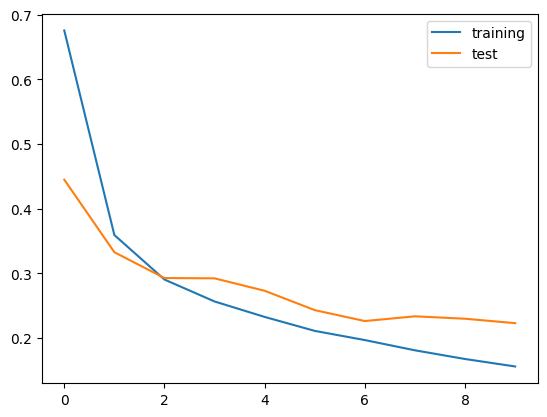

In [30]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.928
